In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

import json
import sys   
import os

from datetime import datetime
from dateutil import parser

## Get only id out of the battle data
from operator import itemgetter
## listwise substraction
from operator import sub

## Selecting Data File and Cleaning 



In [2]:
dirlist = os.listdir(os.getcwd())
[fname for fname in dirlist if "_battles.json" in fname ]

['2018-10-17_battles.json',
 '2018-10-22_battles.json',
 '2018-11-06_battles.json',
 '2018-11-25_battles.json',
 '2018-12-07_battles.json',
 '2019-01-20_battles.json']

In [3]:
#data size
with open("2019-01-20_battles.json", "r") as f:
    print(sum(1 for row in f)) 

120045


In [4]:
#### Load Data

## Somehow pd.read_json does not load my collected data. 
## Pandas throw me a OSError if I do read_json.
## I suspect it is due to the large file size of my battles_temp.json 
## beacuse I can read half of the file with read_json.

## Solution: I am appending each line into a list called data then turn that list into dataframe.
data = []
with open("battles_temp.json", 'r') as f:
    for idx, line in enumerate(f):
        try:
            data.append(json.loads(line))
#             if idx == 120000:
#                 print("done")
#                 break
        except Exception as e:
            print(e)
            print(idx)
            break

In [5]:
# turn to dataframe
battles_df = pd.DataFrame(data)
battles_df.head()

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,{'name': 'Clan League'},None,slotDeck,"{'id': 72000066, 'name': 'Showdown_Ladder'}","[{'tag': 'CUL0J2GR', 'name': 'Yung Lord!', 'cr...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",0,1,NaN,clanWarWarDay,1539049935,NaN,-1
1,"{'name': 'Spell Valley', 'arena': 'Arena 5', '...",None,draft,"{'name': 'DraftMode', 'deck': 'Draft', 'cardLe...","[{'tag': 'Y8922G0', 'name': 'izzy', 'crownsEar...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",3,1,NaN,clanWarCollectionDay,1538963279,NaN,2
2,"{'name': 'Royal Arena', 'arena': 'Arena 7', 'a...",None,predefined,"{'id': 72000087, 'name': 'ClassicDecks_Friendly'}","[{'tag': 'LLLQQJ8', 'name': 'kinosor', 'crowns...",1,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",0,1,NaN,clanWarCollectionDay,1538963059,NaN,-1
3,"{'name': 'Royal Arena', 'arena': 'Arena 7', 'a...",None,draft,"{'name': 'DraftMode', 'deck': 'Draft', 'cardLe...","[{'tag': 'QPYQ82RQ', 'name': 'TheIchiGamerr', ...",0,"[{'tag': '8QPQCJ80R', 'name': 'zoko', 'crownsE...",3,1,NaN,clanWarCollectionDay,1538962842,NaN,3
4,"{'name': 'Jungle Arena', 'arena': 'Arena 9', '...",None,slotDeck,"{'name': 'TeamVsTeamLadder', 'deck': 'Collecti...","[{'tag': 'PYPVQ2V0', 'name': '-=alvin=-', 'cro...",0,"[{'tag': '9PU88YCYU', 'name': 'q ............'...",3,2,NaN,2v2,1538893590,NaN,3


Text(0.5,1,'Trophies density distribution')

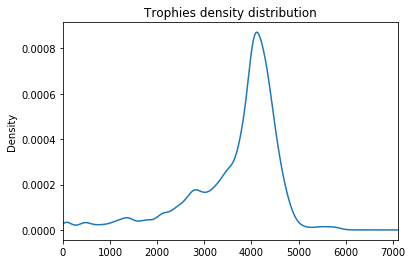

In [6]:
## show trophies distribution
# battles_df = pd.read_json("C:/Users/Jiahong Xue/Desktop/Projects/Clash-Royale-Card-Usage-Analysis/battles_temp.json", lines=True)
# the above line somehow gives me osERROR. I searched for it. It is likely an error for python 3.6.x running on windows. I also tested this line for a smaller file size which runs just fine.

battles_df.opponent[battles_df.opponent.apply(lambda x:"startTrophies" in x[0].keys())].apply(lambda x:x[0]["startTrophies"]).sort_values().plot(kind = "kde")
plt.xlim(0,7100)
plt.title("Trophies density distribution")

In [7]:
# battle types.
battles_df.type.value_counts()

PvP                     51326
2v2                     34815
challenge               19924
clanWarCollectionDay     7969
clanWarWarDay            2505
clanMate                 1261
friendly                 1005
tournament                949
clanMate2v2               220
challenge2v2               29
Name: type, dtype: int64

Text(0.5,1,'winning rate')

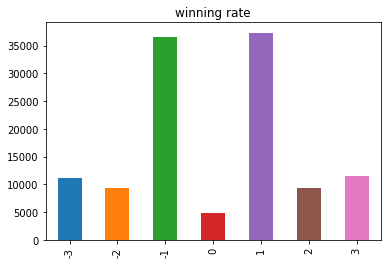

In [8]:
## wining rate by # of towers taken down 
battles_df.winner.value_counts().sort_index().plot(kind = 'bar');
plt.title("winning rate")

The winning rate above is calculated by substract team crowns to opponent crowns.
It is interesting that winning with 2 crowns has a lower rate than 3 crowns. Considering 3 crown can only occur if either side of the player get 3 crowns. But 2 crowns happens can be either 2 crowns to 0 crowns or 3 crowns to 1 crowns.

In [9]:
# Prepare PVP battle
PVP_battles_df = battles_df[battles_df.type == "PvP"]
PVP_battles_df.reset_index().drop("index", axis = 1)

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9C2CUUYJJ', 'name': 'IGOR', 'crownsE...",2,"[{'tag': '88YJLQ89J', 'name': 'hanel the king'...",1,1,NaN,PvP,1538848966,NaN,-1
1,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8CQYYCYLU', 'name': '✌God_Master#2✌'...",0,"[{'tag': 'CPL09LRL', 'name': 'm3ndonca', 'crow...",1,1,NaN,PvP,1539100252,NaN,1
2,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '9PC9LQYRP', 'name': 'MaNa', 'crownsE...",1,"[{'tag': 'CPL09LRL', 'name': 'm3ndonca', 'crow...",0,1,NaN,PvP,1539089628,NaN,-1
3,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2RLU0RQVL', 'name': 'NightZeus', 'cr...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",2,1,NaN,PvP,1539117923,NaN,1
4,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '28GUP9JGL', 'name': 'lolcat15', 'cro...",3,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",0,1,NaN,PvP,1539117681,NaN,-3
5,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8RV08CG8G', 'name': 'Lu21', 'crownsE...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",3,1,NaN,PvP,1539117488,NaN,2
6,"{'name': 'Electro Valley', 'arena': 'Arena 11'...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2UJYPQR0U', 'name': 'thelegend27', '...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",2,1,NaN,PvP,1539117318,NaN,1
7,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2VPPCQGY2', 'name': 'DeMoTiX', 'crow...",2,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",1,1,NaN,PvP,1539117112,NaN,-1
8,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2PPPJ2YLY', 'name': 'dejan', 'crowns...",3,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",1,1,NaN,PvP,1539116871,NaN,-2
9,"{'name': 'Legendary Arena', 'arena': 'Arena 12...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8GLL98QQL', 'name': 'Hellexia', 'cro...",1,"[{'tag': 'PJC8GR9J', 'name': 'enzo', 'crownsEa...",0,1,NaN,PvP,1539116760,NaN,-1


In [10]:
PVP_battles_df.drop(42,axis=0,inplace = True)
# somehow this row has has PVP type but 2 opponent data. Which is not True for PVP battle

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Visualizing level facts contributes to the winner rate

In [11]:
## adjust card level. Rationale from Supercell recent updates
## illustrating in this cell
## implemented in the next cell
pd.DataFrame(PVP_battles_df.team.apply(lambda x:([[l["level"]+8,l['rarity']] if l['rarity'] == "Legendary" 
                                                  else [l["level"]+5,l['rarity']] if l['rarity'] == "Epic"
                                                  else [l['level']+2,l['rarity']] if l['rarity'] == 'Rare'
                                                  else [l['level'],l['rarity']] for l in x[0]['deck']]))).loc[84].values

array([list([[10, 'Common'], [10, 'Legendary'], [10, 'Rare'], [11, 'Common'], [10, 'Rare'], [11, 'Epic'], [11, 'Epic'], [11, 'Rare']])],
      dtype=object)

In [12]:
## trophies, card_level Vs. Winner
PVP_battles_df.dropna()
team_level = pd.DataFrame(PVP_battles_df.team.apply(lambda x:np.mean([l["level"]+8 if l['rarity'] == "Legendary" 
                                                  else l["level"]+5 if l['rarity'] == "Epic"
                                                  else l['level']+2 if l['rarity'] == 'Rare'
                                                  else l['level'] for l in x[0]['deck']])))
opponent_level = pd.DataFrame(PVP_battles_df.opponent.apply(lambda x:np.mean([l["level"]+8 if l['rarity'] == "Legendary" 
                                                  else l["level"]+5 if l['rarity'] == "Epic"
                                                  else l['level']+2 if l['rarity'] == 'Rare'
                                                  else l['level'] for l in x[0]['deck']])))
level_winner_df = pd.concat([team_level,opponent_level,pd.Series((team_level["team"] - opponent_level["opponent"])),PVP_battles_df.winner.apply(lambda x: 1 if x>0 else 0)],axis = 1, ignore_index = True)

level_winner_df.columns = ["team","opponent","team_opponent diff","winner"]

In [13]:
level_winner_df.head()

,team,opponent,team_opponent diff,winner
82,10.500,9.000,1.500,1
84,10.500,10.125,0.375,0
104,10.875,9.625,1.250,1
105,10.875,9.500,1.375,0
106,10.875,9.375,1.500,1


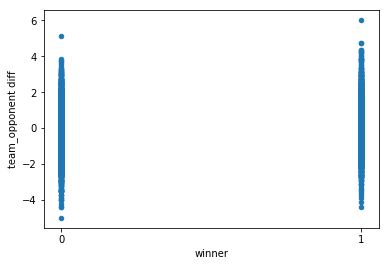

In [14]:
## visualizing winner vs level difference.
level_winner_df[["team_opponent diff", "winner"]].plot(kind = 'scatter', x = "winner", y = "team_opponent diff")
plt.xticks([0,1]);

Although the plot above some what shows the larger the difference in a battle, the high chance of wining. (The dots on the wining axis is slightly higher overall) But it does not match my expectation. A number of matches with 4 levels ave card level advance but still lose the battle. I wonder how it would perform in a violin plot.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


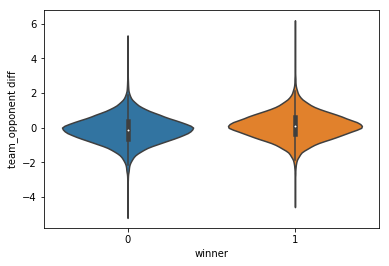

In [15]:
sns.violinplot(x = "winner", y = "team_opponent diff", data = level_winner_df);

Again the difference between the peaks of two violin plot does not differ by that much as I expected. Let's exclude those data that is close to 0 on team-opponent diff (y) axis and see if this makes a difference. In the following cell, Enter the quantile of number around the mean into the select_quantile function, and the rest of code will do the job.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


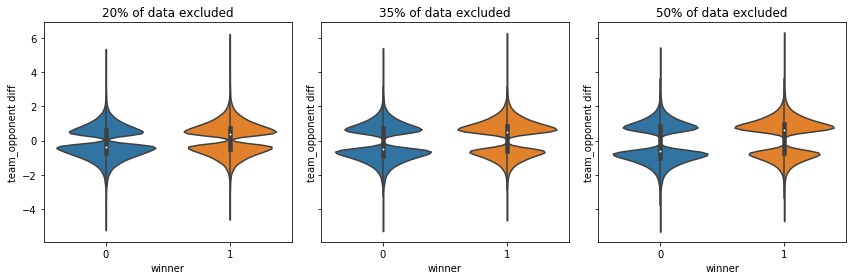

In [16]:
def select_quantile(q):
    quantile_to_exclude = q
    quantile_Start = level_winner_df["team_opponent diff"].quantile(0.5 - quantile_to_exclude/100/2)
    quantile_End = level_winner_df["team_opponent diff"].quantile(0.5 + quantile_to_exclude/100/2)
    level_winner_df_q = level_winner_df[(level_winner_df["team_opponent diff"] < quantile_Start) | (level_winner_df["team_opponent diff"] > quantile_End)]
    return level_winner_df_q

fig, [ax1,ax2,ax3]  = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
axes = [ax1,ax2,ax3]
quantile_list = [20,35,50]

sns.violinplot(x = "winner", y = "team_opponent diff", data = select_quantile(20), ax=ax1);
ax1.set_title("20% of data excluded")

sns.violinplot(x = "winner", y = "team_opponent diff", data = select_quantile(35), ax=ax2);
ax2.set_title("35% of data excluded")

sns.violinplot(x = "winner", y = "team_opponent diff", data = select_quantile(50), ax=ax3);
ax3.set_title("50% of data excluded")

plt.tight_layout()

The larger the number excluded, we can at least see the rest portion of the data shows winner will have a heavier potion on the top half and not winner goes the opposite. The level of the cards does give a greater chance of winning

In [17]:
#expand a list column to a dataframe
opponent_df = pd.DataFrame(PVP_battles_df.opponent.apply(lambda x:x[0]).values.tolist())

team_df = pd.DataFrame(PVP_battles_df.team.apply(lambda x:x[0]).values.tolist())

In [18]:
## Get only id out of the battle data
from operator import itemgetter

key1 = itemgetter('id')
#map(key1,filter(lambda x: ["key2"] == criterion, list_of_dicts))
opponent_deck_df = pd.DataFrame(opponent_df.deck.apply(lambda x:map(itemgetter('id'), x)).values.tolist())

team_deck_df = pd.DataFrame(team_df.deck.apply(lambda x:map(itemgetter('id'), x)).values.tolist())